Rizki Wahyudie, Fikri Arif Rahman, Nika Qisty, Nikita Sabila, Reyhan Agus,Riyandi Firman, Vernando Bayu

Crawling Data in Twitter

# Import Library

In [6]:
import tweepy
import re
import pandas as pd
import string
import csv
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.tokenize import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt

# Set API TOKEN

In [7]:
# access_token = "2343213590-Zv7Bg4vCjLjCch9C3S2CZmlpRmUDvmG5BED478R"
# access_token_secret = "AoRGiVKjPrtIzxkqn6lAEQJ4GboVykJa98Z7FUZbENAO4"
# api_key = "vmuJ1kTILinVnAacV7QeDAWEv"
# api_key_secret = "WUnwc7UoS3MpRVf3dLRPGSNoAXNWwqxJRqSdyp8DKfH4MnBDnz"

In [8]:
api_key = "earScsYmfXq5tOUpzEziXxKwt"

api_key_secret = "C6VouJVg0UUahbSqasFQAcRUE3dNdnaZFamS9zrXnp4cqOvAyP"

access_token = "66106451-UFbSuHUjKFViuD5RaW3B14AIMmzlEcuEMFK4xrZCu"

access_token_secret = "xw78fGFsSmdX3KXZpHIgcU03yK64gxoYfZ2lfjhyZ5stU"

In [9]:
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

# Melakukan pencarian sesuai keyword

In [10]:
keyword = input("Masukan keyword: ")
naOfTweet = int(input('Jumlah tweet untuk di analisa: '))
tweets = tweepy.Cursor(api.search_tweets, q=keyword, lang='id').items(naOfTweet)
tweet_list = []
tweet_user = []
tweet_id = []
tweet_loc = []

for tweet in tweets:
  print(tweet.text)
  tweet_list.append(tweet.text)
  tweet_user.append(tweet.user.screen_name)
  tweet_id.append(tweet.user.id)
  tweet_loc.append(tweet.user.location)

RT @GHOneTV: Goal ⚽️
Germany 🇩🇪 1:2 Japan 🇯🇵 

⌚️83’ Takuma Asano 
#EIBQATAR2022
RT @viewspxrn: Japan. https://t.co/56x3YMlS6i
@Unimoni_India Japan 

#Unimoni #UnimoniIndia
#FIFAWorldCup2022
@Unimoni_India
RT @haziqaiman97_: Lucky draw jersey fifa World Cup 2022. Dapat jersey Japan. Nasib menang 😂👍🏻 https://t.co/NfAmN8qeaL
@shavshavshav @MORITAKA69 PLIS BANGET JANGN TUtup DULU WARUNGNYA AKU MO BELI @ONEOKROCK_japan 😡😡
@BibleWichapasPH @biblesumett JAPAN!! #NewCenLadxBibleBuild
@biblesumett @Buildbuilddd
Lucky draw jersey fifa World Cup 2022. Dapat jersey Japan. Nasib menang 😂👍🏻 https://t.co/NfAmN8qeaL
@micandreii8 ily, imy, hbd, mbtc, gbu, ANO YUNG JAPAN BADHSASDHADHSADSHADHASHSHDSH
RT @nabihjw: Japan 🇯🇵 https://t.co/pYHatPRM5a
RT @ZOELLTH: help rt please? thank u! (☆▽☆)

hii, di hari jumat ini aku bawa layout sub japan dengan harga 3k/each payment avail via qris d…
RT @haechanngemini: guys aku mau GA recehan

- Spay 30k buat 1 orang
- Sharing nobar TDS 2 Japan 27 Nov jam 14.00 WIB bua

# Membuat dataframe yang isinya kumpulan tweet

Hiburang, olahraga, pendidikan, teknologi, dan politik
cari tweetnya, trus analisa sentimen positif/negatif
datanya 200
cari -> cleaning -> word cloud -> 
(keseluruhan, +, -)


In [11]:
dictTweets = {'waktu':tweet_loc,'id':tweet_id,'username':tweet_user,'tweet':tweet_list}
df = pd.DataFrame(dictTweets, columns=['username','tweet'])
df

,username,tweet
0,RohaizBajwa1,RT @GHOneTV: Goal ⚽️\nGermany 🇩🇪 1:2 Japan 🇯🇵 ...
1,emmmmmmmzy,RT @viewspxrn: Japan. https://t.co/56x3YMlS6i
2,chidambar08,@Unimoni_India Japan \n\n#Unimoni #UnimoniIndi...
3,haziqaiman97__,RT @haziqaiman97_: Lucky draw jersey fifa Worl...
4,yamastoru,@shavshavshav @MORITAKA69 PLIS BANGET JANGN TU...
5,lotionpete,@BibleWichapasPH @biblesumett JAPAN!! #NewCenL...
6,haziqaiman97_,Lucky draw jersey fifa World Cup 2022. Dapat j...
7,reinjpg,"@micandreii8 ily, imy, hbd, mbtc, gbu, ANO YUN..."
8,baibipckd,RT @nabihjw: Japan 🇯🇵 https://t.co/pYHatPRM5a
9,Luvlayout9,RT @ZOELLTH: help rt please? thank u! (☆▽☆)\n\...


# Membersihkan tweet

In [12]:
dictTweets = pd.DataFrame(tweet_list)
dictTweets["text"] = dictTweets[0]

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('@[^\s]+','',text)
    text = re.sub('rt', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(' +', ' ', text)
    return text

In [13]:
dictTweets['text'] = dictTweets['text'].apply(lambda x:clean_text(x))
df_fix=pd.DataFrame(dictTweets['text'])
df_fix

,text
0,goal ⚽️germany 🇩🇪 japan 🇯🇵 ⌚️’ takuma asano
1,japan
2,japan unimoni
3,lucky draw jersey fifa world cup dapat jersey...
4,plis banget jangn tutup dulu warungnya aku mo...
5,japan newcenladxbiblebuild
6,lucky draw jersey fifa world cup dapat jersey ...
7,ily imy hbd mbtc gbu ano yung japan badhsasdh...
8,japan 🇯🇵
9,help please thank u ☆▽☆hii di hari jumat ini ...


Membuang data duplikat

In [14]:
df_fix.drop_duplicates(inplace=True)
df_fix

,text
0,goal ⚽️germany 🇩🇪 japan 🇯🇵 ⌚️’ takuma asano
1,japan
2,japan unimoni
3,lucky draw jersey fifa world cup dapat jersey...
4,plis banget jangn tutup dulu warungnya aku mo...
5,japan newcenladxbiblebuild
6,lucky draw jersey fifa world cup dapat jersey ...
7,ily imy hbd mbtc gbu ano yung japan badhsasdh...
8,japan 🇯🇵
9,help please thank u ☆▽☆hii di hari jumat ini ...


# fungsi tokenisasi (Memecah kalimat menjadi beberapa kata)

In [15]:
def tokenizingText(text):
  text = word_tokenize(text)
  return text

In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
df_fix['text_preprocessed'] = df_fix['text'].apply(tokenizingText)
df_fix

,text,text_preprocessed
0,goal ⚽️germany 🇩🇪 japan 🇯🇵 ⌚️’ takuma asano,"[goal, ⚽️germany, 🇩🇪, japan, 🇯🇵, ⌚️, ’, takuma..."
1,japan,[japan]
2,japan unimoni,"[japan, unimoni]"
3,lucky draw jersey fifa world cup dapat jersey...,"[lucky, draw, jersey, fifa, world, cup, dapat,..."
4,plis banget jangn tutup dulu warungnya aku mo...,"[plis, banget, jangn, tutup, dulu, warungnya, ..."
5,japan newcenladxbiblebuild,"[japan, newcenladxbiblebuild]"
6,lucky draw jersey fifa world cup dapat jersey ...,"[lucky, draw, jersey, fifa, world, cup, dapat,..."
7,ily imy hbd mbtc gbu ano yung japan badhsasdh...,"[ily, imy, hbd, mbtc, gbu, ano, yung, japan, b..."
8,japan 🇯🇵,"[japan, 🇯🇵]"
9,help please thank u ☆▽☆hii di hari jumat ini ...,"[help, please, thank, u, ☆▽☆hii, di, hari, jum..."


# Memasukan kamus (kata positif & negatif)

In [18]:
lexicon_positive = dict()
import csv
with open('positive_lex.csv', 'r') as csvfile:
    pos_word = csv.reader(csvfile, delimiter=',')
    next(pos_word, None)
    for row in pos_word:
      lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('negatif_lex.csv', 'r') as csvfile:
    neg_word = csv.reader(csvfile, delimiter=',')
    next(neg_word, None)
    for row in neg_word:
        lexicon_negative[row[0]] = int(row[1])

# Fungsi analisis secara perulangan

In [19]:
def sentiment_analysis(text):
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    sentimen=''
    if (score > 0):
        sentimen = 'positive'
    elif (score < 0):
        sentimen = 'negative'
    else:
        sentimen = 'neutral'
    return score, sentimen

Menghitung jumlah tweet bersifat negatif, positif, & neutral

neutral     14
negative     7
positive     3
Name: sentimen, dtype: int64


<AxesSubplot:xlabel='sentimen', ylabel='count'>

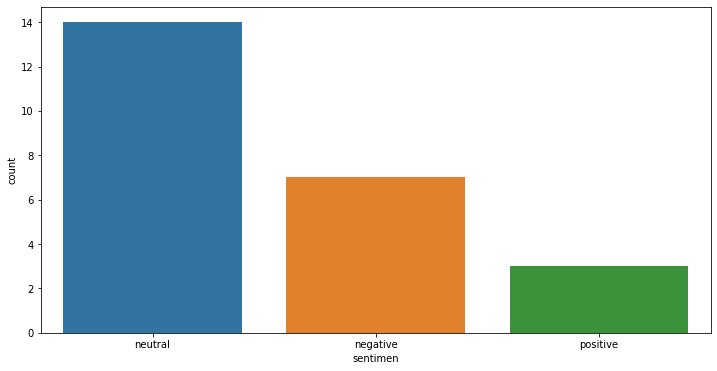

In [20]:
results = df_fix['text_preprocessed'].apply(sentiment_analysis)
results = list(zip(*results))
df_fix['sentimen_score'] = results[0]
df_fix['sentimen'] = results[1]
print(df_fix['sentimen'].value_counts())

plt.figure(figsize=(12,6))
sns.countplot(x='sentimen',data=df_fix)



In [21]:
df_fix

,text,text_preprocessed,sentimen_score,sentimen
0,goal ⚽️germany 🇩🇪 japan 🇯🇵 ⌚️’ takuma asano,"[goal, ⚽️germany, 🇩🇪, japan, 🇯🇵, ⌚️, ’, takuma...",0,neutral
1,japan,[japan],0,neutral
2,japan unimoni,"[japan, unimoni]",0,neutral
3,lucky draw jersey fifa world cup dapat jersey...,"[lucky, draw, jersey, fifa, world, cup, dapat,...",-4,negative
4,plis banget jangn tutup dulu warungnya aku mo...,"[plis, banget, jangn, tutup, dulu, warungnya, ...",-1,negative
5,japan newcenladxbiblebuild,"[japan, newcenladxbiblebuild]",0,neutral
6,lucky draw jersey fifa world cup dapat jersey ...,"[lucky, draw, jersey, fifa, world, cup, dapat,...",-4,negative
7,ily imy hbd mbtc gbu ano yung japan badhsasdh...,"[ily, imy, hbd, mbtc, gbu, ano, yung, japan, b...",0,neutral
8,japan 🇯🇵,"[japan, 🇯🇵]",0,neutral
9,help please thank u ☆▽☆hii di hari jumat ini ...,"[help, please, thank, u, ☆▽☆hii, di, hari, jum...",7,positive


# Membuat dataframe tweet sesuai dengan sentimen

In [22]:
df_fix_neutral = df_fix[df_fix["sentimen"] == 'neutral']
df_fix_positive = df_fix[df_fix["sentimen"] == 'positive']
df_fix_negative = df_fix[df_fix["sentimen"] == 'negative']

In [23]:
df_fix_negative.sort_values('sentimen_score')

,text,text_preprocessed,sentimen_score,sentimen
28,thread pagi tadi saya dijemput doshisha women...,"[thread, pagi, tadi, saya, dijemput, doshisha,...",-6,negative
3,lucky draw jersey fifa world cup dapat jersey...,"[lucky, draw, jersey, fifa, world, cup, dapat,...",-4,negative
6,lucky draw jersey fifa world cup dapat jersey ...,"[lucky, draw, jersey, fifa, world, cup, dapat,...",-4,negative
27,kata gue mah mending hanti nama awards aja jg...,"[kata, gue, mah, mending, hanti, nama, awards,...",-3,negative
17,wah udah announce japan tour kemungkinan asia ...,"[wah, udah, announce, japan, tour, kemungkinan...",-2,negative
26,oh adik adik dua orang tu fly japan jugak i gu...,"[oh, adik, adik, dua, orang, tu, fly, japan, j...",-2,negative
4,plis banget jangn tutup dulu warungnya aku mo...,"[plis, banget, jangn, tutup, dulu, warungnya, ...",-1,negative


Word Cloud Neutral


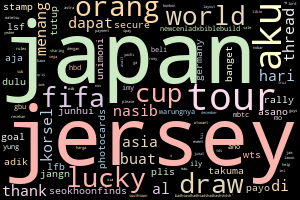

Word Cloud Neutral


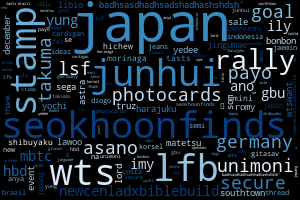

Word Cloud Positive


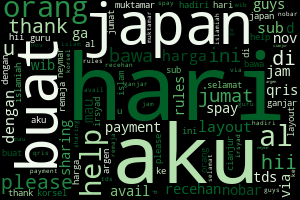

Word Cloud Negative


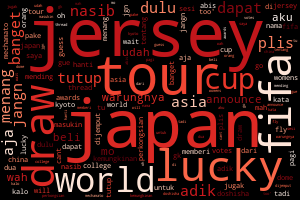

In [24]:
#Function to Create Wordcloud Neutral
def create_wordcloud_all(text):
    #mask = np.array(Image.open("../input/cloudpng/cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="black",
    colormap='Pastel1',
    width = 300, height = 200,
    max_words=100,
    stopwords=stopwords,
    repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Neutral")
    path="wc.png"
    display(Image.open(path))

create_wordcloud_all(df_fix["text"].values)

#Function to Create Wordcloud Neutral
def create_wordcloud_neutral(text):
    #mask = np.array(Image.open("../input/cloudpng/cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="black",
    colormap='Blues',
    width = 300, height = 200,
    max_words=100,
    stopwords=stopwords,
    repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Neutral")
    path="wc.png"
    display(Image.open(path))

create_wordcloud_neutral(df_fix_neutral["text"].values)

#Function to Create Wordcloud
def create_wordcloud_positive(text):
    #mask = np.array(Image.open("../input/cloudpng/cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="black",
    colormap='Greens',
    width = 300, height = 200,
    max_words=100,
    stopwords=stopwords,
    repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Positive")
    path="wc.png"
    display(Image.open(path))

create_wordcloud_positive(df_fix_positive["text"].values)

#Function to Create Wordcloud
def create_wordcloud_negative(text):
    #mask = np.array(Image.open("../input/cloudpng/cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="black",
    colormap='Reds',
    width = 300, height = 200,
    max_words=100,
    stopwords=stopwords,
    repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Negative")
    path="wc.png"
    display(Image.open(path))

create_wordcloud_negative(df_fix_negative["text"].values)